In [1]:
%matplotlib inline
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os

def load_GLOVE_embedding_vectors(vocab_txt_path):
    # Source: https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db
    embeddings_dict = {}
    with open(vocab_txt_path, encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], "float32")
            embeddings_dict[word] = vector
    
    word_list = list(embeddings_dict.keys())
    vector_array = np.array([embeddings_dict[word] for word in word_list])
    word_idx_dict = {word: idx for idx, word in enumerate(word_list)}
    print (f'Loaded {len(word_list)} GLOVE embedding words.')
    return embeddings_dict, word_idx_dict, word_list, vector_array

vocab_txt_path = 'glove.6B.50d.txt'
glove_word_vector_dict, glove_word_idx_dict, glove_word_list, glove_vector_array = load_GLOVE_embedding_vectors(vocab_txt_path)
glove_vocab_size = len(glove_word_list)


Loaded 400000 GLOVE embedding words.


In [2]:
# check GloVe is loaded successfully
print (glove_word_list[0])
print (glove_vector_array.shape)

the
(400000, 50)


## Visualize the word vectors in 2D space with t-SNE

I have pre-trained for you, but if it's quick to do it by yourself, so feel free to change the variable `re_trained`. It took me 500 seconds on my PC.

### Project GloVe word vectors to 2-dimensional vectors

In [3]:
re_trained = False

In [4]:
if (re_trained == True):
    from openTSNE import TSNE
    from openTSNE.callbacks import ErrorLogger

    def train_TSNE_visual_words(word_list, vector_list, top_K, random_state=42):
        tsne = TSNE(perplexity=30,
                    metric="euclidean",
                    callbacks=ErrorLogger(),
                    n_jobs=8,
                    random_state=42,
                   )
        tsne_array = tsne.fit(vector_list[:top_K])
        word_vector_dict = {word: tsne_array[idx, :] for idx, word in enumerate(word_list[:top_K])}
        return word_vector_dict, tsne_array
    
    import time
    start_time = time.time()
    word_vector_dict, tsne_array = train_TSNE_visual_words(glove_word_list, glove_vector_array, glove_vocab_size, 42)
    print("--- %s seconds ---" % (time.time() - start_time))
    
    with open ('tsne.txt', 'w', encoding='utf8') as f:
        for idx, word in enumerate(glove_word_list):
            num_str_list = [str(i) for i in tsne_array[idx]]
            f.write(f'{word} {" ".join(num_str_list)}\n')

In [5]:
def load_embedding_vectors(vocab_txt_path):
    # Source: https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db
    embeddings_dict = {}
    with open(vocab_txt_path, encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], "float32")
            embeddings_dict[word] = vector
    
    word_list = list(embeddings_dict.keys())
    vector_list = [embeddings_dict[word] for word in word_list]
    word_idx_dict = {word: idx for idx, word in enumerate(word_list)}
    print (f'Loaded {len(word_list)} embedding words from {vocab_txt_path}.')
    return embeddings_dict, word_idx_dict, word_list, vector_list

tsne_vocab_txt_path = 'tsne.txt'
tsne_word_vector_dict, tsne_word_idx_dict, tsne_word_list, tsne_vector_list = load_embedding_vectors(tsne_vocab_txt_path)
tsne_vocab_size = len(tsne_word_list)

Loaded 400000 embedding words from tsne.txt.


### Extract top words closest to a selected word

In [6]:
def find_closest_embeddings(word_vector_dict, key_word):
    key_vector = word_vector_dict[key_word]
    return sorted(word_vector_dict.keys(), key=lambda word: spatial.distance.euclidean(word_vector_dict[word], key_vector))

def find_top_K_closest_embeddings(word_vector_dict, key_word, K):
    return find_closest_embeddings(word_vector_dict, key_word)[1:K+1]

In [7]:
find_closest_embeddings(word_vector_dict=glove_word_vector_dict, key_word="king")

['king',
 'prince',
 'queen',
 'uncle',
 'ii',
 'grandson',
 'brother',
 'kingdom',
 'son',
 'nephew',
 'elder',
 'iv',
 'ruler',
 'cousin',
 'name',
 'monarch',
 'father',
 'grandfather',
 'reign',
 'throne',
 'iii',
 'lord',
 'henry',
 'mentioned',
 'vi',
 'edward',
 'succeeded',
 'crown',
 'homage',
 'emperor',
 'sons',
 'latter',
 'philip',
 'eldest',
 'later',
 'patron',
 'viii',
 'coronation',
 'heir',
 'brother-in-law',
 'vii',
 'frederick',
 'majesty',
 'charles',
 'mr.',
 'legend',
 'successor',
 'knight',
 'elizabeth',
 'brought',
 'empire',
 'birthplace',
 'as',
 'tribute',
 'hero',
 'assumed',
 'constantine',
 'caesar',
 'george',
 'son-in-law',
 'occasion',
 'napoleon',
 'soon',
 'great',
 'famous',
 'deposed',
 'took',
 'family',
 'once',
 'himself',
 'noble',
 'sir',
 'chose',
 'john',
 '’s',
 'proclaimed',
 'father-in-law',
 'became',
 'imperial',
 'beloved',
 'death',
 'succession',
 'refer',
 'rulers',
 'came',
 'named',
 'footsteps',
 'upon',
 'mr',
 'honour',
 'harr

In [8]:
find_top_K_closest_embeddings(word_vector_dict=glove_word_vector_dict, key_word="king", K=5)

['prince', 'queen', 'uncle', 'ii', 'grandson']

In [9]:
find_top_K_closest_embeddings(word_vector_dict=glove_word_vector_dict, key_word="frog", K=5)

['snake', 'ape', 'toad', 'monkey', 'spider']

In [10]:
# GlOve
vector_king = glove_word_vector_dict['king']
vector_queen = glove_word_vector_dict['queen']
vector_man = glove_word_vector_dict['man']
vector_woman = glove_word_vector_dict['woman']
print ('king - queen', vector_king - vector_queen)
print ('man - woman', vector_man - vector_woman)

king - queen [ 0.12596998 -1.1372299   0.66962993  0.081499    0.24217    -0.73527
  0.08725001 -0.36390004 -0.561182    0.44783002 -0.30347598  0.50713
 -0.640059   -0.66753995  0.39352003  0.25708997  0.25581998 -0.386451
  0.01601005  0.45079002 -0.38064003 -0.52175     0.01098001 -0.58356
  0.13042    -0.41770005 -0.03350008 -0.88575     0.21020997  0.389576
  0.4353     -0.43530002 -0.39569002  0.36874     0.03794     0.00517
 -0.18120003 -0.186358   -0.01485997  1.1987001  -0.05844     0.91547996
 -0.83533     0.51813     0.0487      0.54850996 -0.35146004  0.6733
 -0.6535353   0.09241998]
man - woman [ 0.087144   -0.2182      0.40985996  0.03922001  0.10320008 -0.94165003
  0.06042001 -0.32988    -0.46144     0.35962    -0.31102     0.86824
 -0.96006    -0.01073003 -0.24337    -0.08193001  1.02722     0.21122
 -0.695044    0.00222    -0.29106003 -0.50530005  0.099454   -0.40445
 -0.30181003 -0.1355002   0.06060004  0.07131001  0.19245     0.06115001
  0.3204     -0.07165     0.1

In [11]:
#t-SNE
vector_king = tsne_word_vector_dict['king']
vector_queen = tsne_word_vector_dict['queen']
vector_man = tsne_word_vector_dict['man']
vector_woman = tsne_word_vector_dict['woman']
print ('king - queen', vector_king - vector_queen)
print ('man - woman', vector_man - vector_woman)

king - queen [-0.09347343 -0.13899994]
man - woman [ 0.05589294 -0.04329681]


### Visualization

We would like to see how `king`, `queen`, `man`, `woman` looks like, with top 5 closest words surrrouding them.

king ['prince', 'queen', 'uncle', 'ii', 'grandson']
queen ['princess', 'lady', 'elizabeth', 'prince', 'coronation']
man ['woman', 'another', 'boy', 'one', 'old']
woman ['girl', 'man', 'mother', 'boy', 'her']


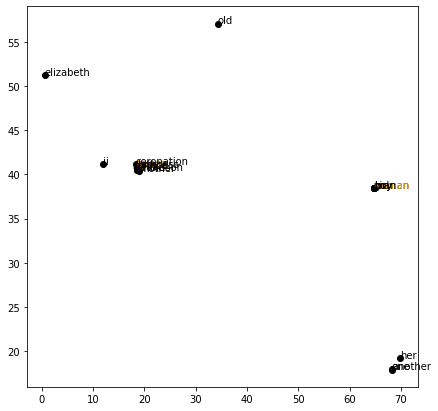

In [13]:
plt.figure(figsize=(7, 7))
keyword_list = ['king', 'queen', 'man', 'woman']

for keyword in keyword_list:
    x, y = tsne_word_vector_dict[keyword]
    plt.scatter(x, y, c='orange')
    plt.annotate(keyword, xy=(x, y), xytext=(0, 0), textcoords='offset points', size=10, color='orange')
    
    top_5_nearest_words = find_top_K_closest_embeddings(word_vector_dict=glove_word_vector_dict, key_word=keyword, K=5)
    print (keyword, top_5_nearest_words)
    for sub_word in top_5_nearest_words:
        x, y = tsne_word_vector_dict[sub_word]
        plt.scatter(x, y, c='black')
        plt.annotate(sub_word, xy=(x, y), xytext=(0, 0), textcoords='offset points', size=10, color='black')
    
plt.show()

Hmm, a bit hard to see, how about viewing only them.

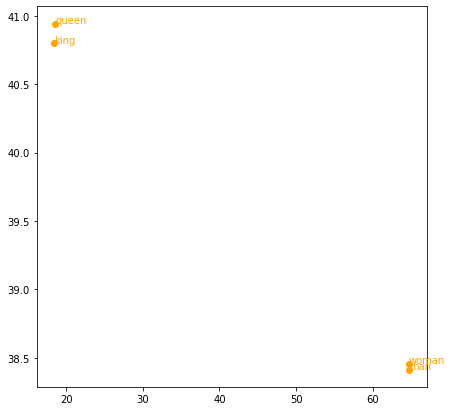

In [14]:
plt.figure(figsize=(7, 7))
keyword_list = ['king', 'queen', 'man', 'woman']

for keyword in keyword_list:
    x, y = tsne_word_vector_dict[keyword]
    plt.scatter(x, y, c='orange')
    plt.annotate(keyword, xy=(x, y), xytext=(0, 0), textcoords='offset points', size=10, color='orange')
    
plt.show()

## Proof of concept

We investigate if the centroid idea works out.

In [40]:
def find_closest_words_to_vector(word_vector_dict, vector, word_list):
    distance_dict = {word: spatial.distance.euclidean(word_vector_dict[word], vector) for word in word_list}
    sorted_words = sorted(word_list, key=lambda word: distance_dict[word])
    return distance_dict, sorted_words

def find_closest_words_to_word(word_vector_dict, key_word, word_list):
    key_vector = word_vector_dict[key_word]
    distance_dict = {word: spatial.distance.euclidean(word_vector_dict[word], key_vector) for word in word_list}
    sorted_words = sorted(word_list, key=lambda word: distance_dict[word])
    return distance_dict, sorted_words

def compute_centroid(word_vector_dict, word_list):
    centroid = np.sum([word_vector_dict[word] for word in word_list], axis=0)
    n_words = len(word_list)
    centroid = centroid / n_words
    return centroid

def find_closest_word_to_centroid(word_vector_dict, vector, exception_list=[]):
    word_list = word_vector_dict.keys()
    distance_dict = {word: spatial.distance.euclidean(word_vector_dict[word], vector) for word in word_list}
    sorted_words = sorted(word_list, key=lambda word: distance_dict[word])
    word = [word for word in sorted_words if word not in exception_list][0]
    distance = distance_dict[word]
    return distance, word

In [41]:
keyword_list = ['dragon', 'green', 'newyork', 'australia', 'pie',
                'seal', 'wake', 'robin', 'pool', 'france',
                'trip', 'duck', 'ham', 'shark', 'grace',
                'spell', 'buck', 'dice', 'bow', 'spring',
                'tube', 'ghost', 'brush', 'drill', 'cotton']

clustered_word = ['newyork', 'australia', 'france']
centroid = compute_centroid(glove_word_vector_dict, clustered_word)
print (centroid)
distance, word = find_closest_word_to_centroid(glove_word_vector_dict, centroid, clustered_word)
print ('Word represents for centroid:', word, distance)
print ('Words closest to centroid in decreasing in similarity order.')
distance_dict, sorted_words = find_closest_words_to_vector(glove_word_vector_dict, centroid, keyword_list)
for word in sorted_words:
    print (word, distance_dict[word])

[ 0.08363666  0.6514953  -0.5748367  -0.42580667 -0.6992667  -0.13927668
 -0.5782533   0.10624     0.10922998 -0.47217     0.34114334 -0.28978
 -0.48928    -0.16257668 -0.22094     0.3520933  -0.09208867 -0.59537596
 -0.61186665  0.59597003 -0.09461201  0.5406466  -0.274461    0.48582998
 -0.12177333 -1.01766     0.18892665 -0.10294667 -0.5989      0.49280867
  1.7325968   0.46219668  0.06654668  0.42092934 -0.18472333 -0.7670767
  0.27162668  0.17195301  0.00743663 -0.40295663  0.7434563  -0.564209
  1.0135666  -0.54791665  0.48283732  1.1717666  -0.28425     0.09581999
 -0.04763335 -0.20822997]
Word represents for centroid: prohertrib 3.2476656436920166
Words closest to centroid in decreasing in similarity order.
france 3.7186849117279053
australia 3.7872653007507324
wake 4.1093878746032715
robin 4.441438674926758
seal 4.565634727478027
trip 4.57887077331543
spell 4.581942558288574
grace 4.590941429138184
pool 4.762134552001953
bow 4.907824516296387
spring 4.910452842712402
ham 5.139

In [42]:
keyword_list = ['dragon', 'green', 'newyork', 'australia', 'pie',
                'seal', 'wake', 'robin', 'pool', 'france',
                'trip', 'duck', 'ham', 'shark', 'grace',
                'spell', 'buck', 'dice', 'bow', 'spring',
                'tube', 'ghost', 'brush', 'drill', 'cotton']

clustered_word = ['seal', 'duck', 'shark']
centroid = compute_centroid(glove_word_vector_dict, clustered_word)
print (centroid)
distance, word = find_closest_word_to_centroid(glove_word_vector_dict, centroid, clustered_word)
print ('Word represents for centroid:', word, distance)
print ('Words closest to centroid in decreasing in similarity order.')
distance_dict, sorted_words = find_closest_words_to_vector(glove_word_vector_dict, centroid, keyword_list)
for word in sorted_words:
    print (word, distance_dict[word])

[ 0.35965732 -0.391844   -0.85795337  0.09057667  0.38060966  0.4850067
 -0.58749336 -0.15278     0.7602666  -0.49245334 -0.07784335  0.7132533
  0.90117663  0.96625996  0.02350167  0.06795999  0.40553665 -0.235831
 -1.23233     0.27397    -0.275833   -0.5657067   0.595513   -0.3247843
  0.09858334 -1.0315567  -0.13521235  0.6582633   0.17619233 -0.86915
  1.3573667  -0.20295    -0.13896     0.77146    -0.29841268  0.44444
  0.258672   -0.1362059   0.04270234 -0.72279334 -0.27866668 -0.01172899
 -0.02446666  0.28056666  0.6844953   0.06487999  0.177436   -0.34573865
  0.47711134 -0.11781999]
Word represents for centroid: cat 2.7491037845611572
Words closest to centroid in decreasing in similarity order.
duck 2.407698154449463
shark 2.6156086921691895
seal 2.919170379638672
dragon 3.653167486190796
ghost 3.685438394546509
buck 3.8235340118408203
green 4.058343887329102
brush 4.30176305770874
bow 4.380235195159912
robin 4.401726722717285
drill 4.477200508117676
spell 4.515389442443848
po